# Detect website defacement with Naive Bayes

* Prepare by **vomtung@gmail.com**

In [1]:
# Install required packages
%pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load training and test datasets
print("Loading datasets...")
train_df = pd.read_csv('dataset/train_data.csv')
test_df = pd.read_csv('dataset/test_data.csv')

# Display basic information about the training dataset
print("=== TRAINING DATASET INFO ===")
print(f"Training data shape: {train_df.shape}")
print(f"Columns: {train_df.columns.tolist()}")
print(f"\nLabel distribution in training data:")
print(train_df['Label'].value_counts())
print(f"Label percentages:")
print(train_df['Label'].value_counts(normalize=True) * 100)

# Display basic information about the test dataset
print("\n=== TEST DATASET INFO ===")
print(f"Test data shape: {test_df.shape}")
print(f"Label distribution in test data:")
print(test_df['Label'].value_counts())
print(f"Label percentages:")
print(test_df['Label'].value_counts(normalize=True) * 100)

# Show sample data
print(f"\n=== SAMPLE DATA ===")
print(train_df.head())

Loading datasets...
=== TRAINING DATASET INFO ===
Training data shape: (1230, 2)
Columns: ['HTML', 'Label']

Label distribution in training data:
Label
1    645
0    585
Name: count, dtype: int64
Label percentages:
Label
1    52.439024
0    47.560976
Name: proportion, dtype: float64

=== TEST DATASET INFO ===
Test data shape: (307, 2)
Label distribution in test data:
Label
1    160
0    147
Name: count, dtype: int64
Label percentages:
Label
1    52.117264
0    47.882736
Name: proportion, dtype: float64

=== SAMPLE DATA ===
                                                HTML  Label
0  Vimeo Interactive Video Experience Platform   ...      0
1  \nHacked By Shield Iran ! \nHacked By \nShield...      1
2  HACKED BY INDIAN CYBER FORCE \nYOU GOT HACKED ...      1
3  Space.com: NASA, Space Exploration and Astrono...      0
4  Home \r\nYou may be trying to access this site...      0


In [3]:
# Prepare data for machine learning
print("Preparing data for Naive Bayes classification...")

# Extract features (HTML content) and labels
X_train = train_df['HTML'].fillna('')  # Handle missing values
y_train = train_df['Label']

X_test = test_df['HTML'].fillna('')    # Handle missing values
y_test = test_df['Label']

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

# TF-IDF Vectorization
# TF-IDF converts text into numerical features that Naive Bayes can process
print("\nApplying TF-IDF vectorization...")
tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,      # Limit vocabulary to top 10,000 most important words
    ngram_range=(1, 2),      # Use both single words (unigrams) and word pairs (bigrams)
    min_df=2,                # Ignore words appearing in fewer than 2 documents
    max_df=0.95,             # Ignore words appearing in more than 95% of documents
    stop_words='english',    # Remove common English stop words
    lowercase=True,          # Convert all text to lowercase
    strip_accents='ascii'    # Remove accents from characters
)

# Fit the vectorizer on training data and transform both training and test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"TF-IDF matrix shape: {X_train_tfidf.shape}")
print(f"Vocabulary size: {len(tfidf_vectorizer.get_feature_names_out())}")
print(f"Sample feature names: {tfidf_vectorizer.get_feature_names_out()[:10]}")
print("TF-IDF vectorization completed!")

Preparing data for Naive Bayes classification...
Training samples: 1230
Test samples: 307

Applying TF-IDF vectorization...
TF-IDF matrix shape: (1230, 10000)
Vocabulary size: 10000
Sample feature names: ['00' '00 00' '00 pm' '000' '000 000' '000 new' '00am' '00am 30pm' '00pm'
 '01']
TF-IDF vectorization completed!
TF-IDF matrix shape: (1230, 10000)
Vocabulary size: 10000
Sample feature names: ['00' '00 00' '00 pm' '000' '000 000' '000 new' '00am' '00am 30pm' '00pm'
 '01']
TF-IDF vectorization completed!


In [4]:
# Train Naive Bayes Model
print("Training Multinomial Naive Bayes model...")

# Multinomial Naive Bayes is ideal for text classification with TF-IDF features
# It assumes features (word frequencies) follow a multinomial distribution
naive_bayes_model = MultinomialNB(
    alpha=1.0,          # Smoothing parameter (Laplace smoothing)
    fit_prior=True      # Learn class prior probabilities from training data
)

# Train the model on TF-IDF transformed training data
naive_bayes_model.fit(X_train_tfidf, y_train)

# Make predictions on both training and test sets
print("Making predictions...")
y_train_pred = naive_bayes_model.predict(X_train_tfidf)
y_test_pred = naive_bayes_model.predict(X_test_tfidf)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display results
print(f"\n=== MODEL PERFORMANCE ===")
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Check for overfitting
accuracy_diff = train_accuracy - test_accuracy
print(f"Accuracy Difference (Train - Test): {accuracy_diff:.4f}")
if accuracy_diff > 0.05:
    print("⚠️  Possible overfitting detected (>5% difference)")
else:
    print("✅ Good generalization (minimal overfitting)")

print("Naive Bayes model training completed!")

Training Multinomial Naive Bayes model...
Making predictions...

=== MODEL PERFORMANCE ===
Training Accuracy: 0.9959 (99.59%)
Test Accuracy: 0.9967 (99.67%)
Accuracy Difference (Train - Test): -0.0008
✅ Good generalization (minimal overfitting)
Naive Bayes model training completed!


=== DETAILED CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

      Normal     1.0000    0.9932    0.9966       147
      Hacked     0.9938    1.0000    0.9969       160

    accuracy                         0.9967       307
   macro avg     0.9969    0.9966    0.9967       307
weighted avg     0.9968    0.9967    0.9967       307


=== CONFUSION MATRIX ANALYSIS ===
True Negatives (Normal correctly classified): 146
False Positives (Normal misclassified as Hacked): 1
False Negatives (Hacked misclassified as Normal): 0
True Positives (Hacked correctly classified): 160

=== ADDITIONAL METRICS ===
Precision for Hacked websites: 0.9938
Recall for Hacked websites: 1.0000
Specificity (True Negative Rate): 0.9932


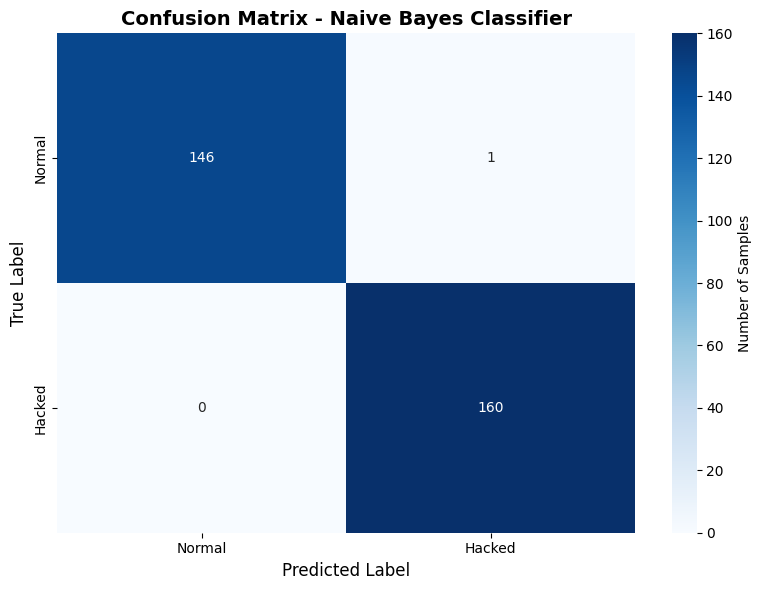

In [5]:
# Detailed Model Evaluation
print("=== DETAILED CLASSIFICATION REPORT ===")
# Classification report provides precision, recall, f1-score for each class
class_names = ['Normal', 'Hacked']
report = classification_report(y_test, y_test_pred, target_names=class_names, digits=4)
print(report)

# Confusion Matrix Analysis
print("\n=== CONFUSION MATRIX ANALYSIS ===")
cm = confusion_matrix(y_test, y_test_pred)

# Extract confusion matrix values
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives (Normal correctly classified): {tn}")
print(f"False Positives (Normal misclassified as Hacked): {fp}")
print(f"False Negatives (Hacked misclassified as Normal): {fn}")
print(f"True Positives (Hacked correctly classified): {tp}")

# Calculate additional metrics
precision_hacked = tp / (tp + fp) if (tp + fp) > 0 else 0
recall_hacked = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print(f"\n=== ADDITIONAL METRICS ===")
print(f"Precision for Hacked websites: {precision_hacked:.4f}")
print(f"Recall for Hacked websites: {recall_hacked:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Number of Samples'})
plt.title('Confusion Matrix - Naive Bayes Classifier', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

=== ROC CURVE ANALYSIS ===


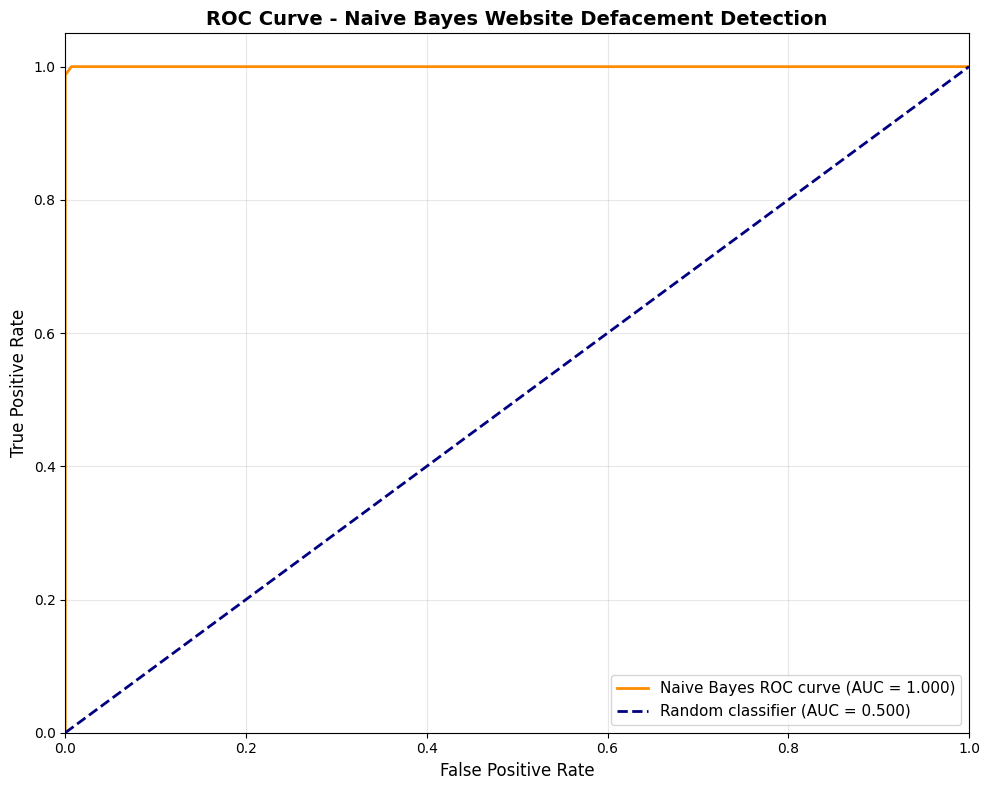

ROC AUC Score: 1.0000
Model Performance: Excellent
The model can distinguish between normal and hacked websites with excellent accuracy.


In [6]:
# ROC Curve Analysis
print("=== ROC CURVE ANALYSIS ===")

# Get prediction probabilities for ROC curve
# predict_proba returns [prob_normal, prob_hacked] for each sample
y_test_proba = naive_bayes_model.predict_proba(X_test_tfidf)[:, 1]  # Probability of 'Hacked' class

# Calculate ROC curve components
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'Naive Bayes ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Random classifier (AUC = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Naive Bayes Website Defacement Detection', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Interpret AUC score
print(f"ROC AUC Score: {roc_auc:.4f}")
if roc_auc >= 0.9:
    interpretation = "Excellent"
elif roc_auc >= 0.8:
    interpretation = "Good"
elif roc_auc >= 0.7:
    interpretation = "Fair"
elif roc_auc >= 0.6:
    interpretation = "Poor"
else:
    interpretation = "Very Poor"

print(f"Model Performance: {interpretation}")
print(f"The model can distinguish between normal and hacked websites with {interpretation.lower()} accuracy.")

=== FEATURE IMPORTANCE ANALYSIS ===
=== TOP FEATURES INDICATING HACKED WEBSITES ===
(Higher log probability difference = stronger indication of hacking)
 1. 'hacked': 5.2009
 2. 'cyber': 3.1421
 3. 'mr': 3.1388
 4. 'greetz': 3.1071
 5. 'hacked mr': 2.9439
 6. 'cyber team': 2.9423
 7. 'hacker': 2.7695
 8. 'ghost': 2.7303
 9. 'indonesian': 2.6912
10. '0x1998': 2.6742
11. 'ft': 2.5632
12. 'aku': 2.5184
13. 'blackhat': 2.4906
14. 'hackers': 2.4791
15. 'root': 2.4193

=== TOP FEATURES INDICATING NORMAL WEBSITES ===
(Lower log probability difference = stronger indication of normal site)
 1. 'news': -2.4297
 2. 'new': -2.2321
 3. 'business': -2.1946
 4. 'privacy': -2.1901
 5. 'sign': -2.1751
 6. 'search': -2.1690
 7. 'google': -2.1168
 8. 'read': -2.0785
 9. 'help': -2.0658
10. 'learn': -2.0591
11. 'services': -2.0364
12. 'home': -2.0339
13. 'content': -1.9818
14. 'use': -1.9648
15. 'english': -1.9625


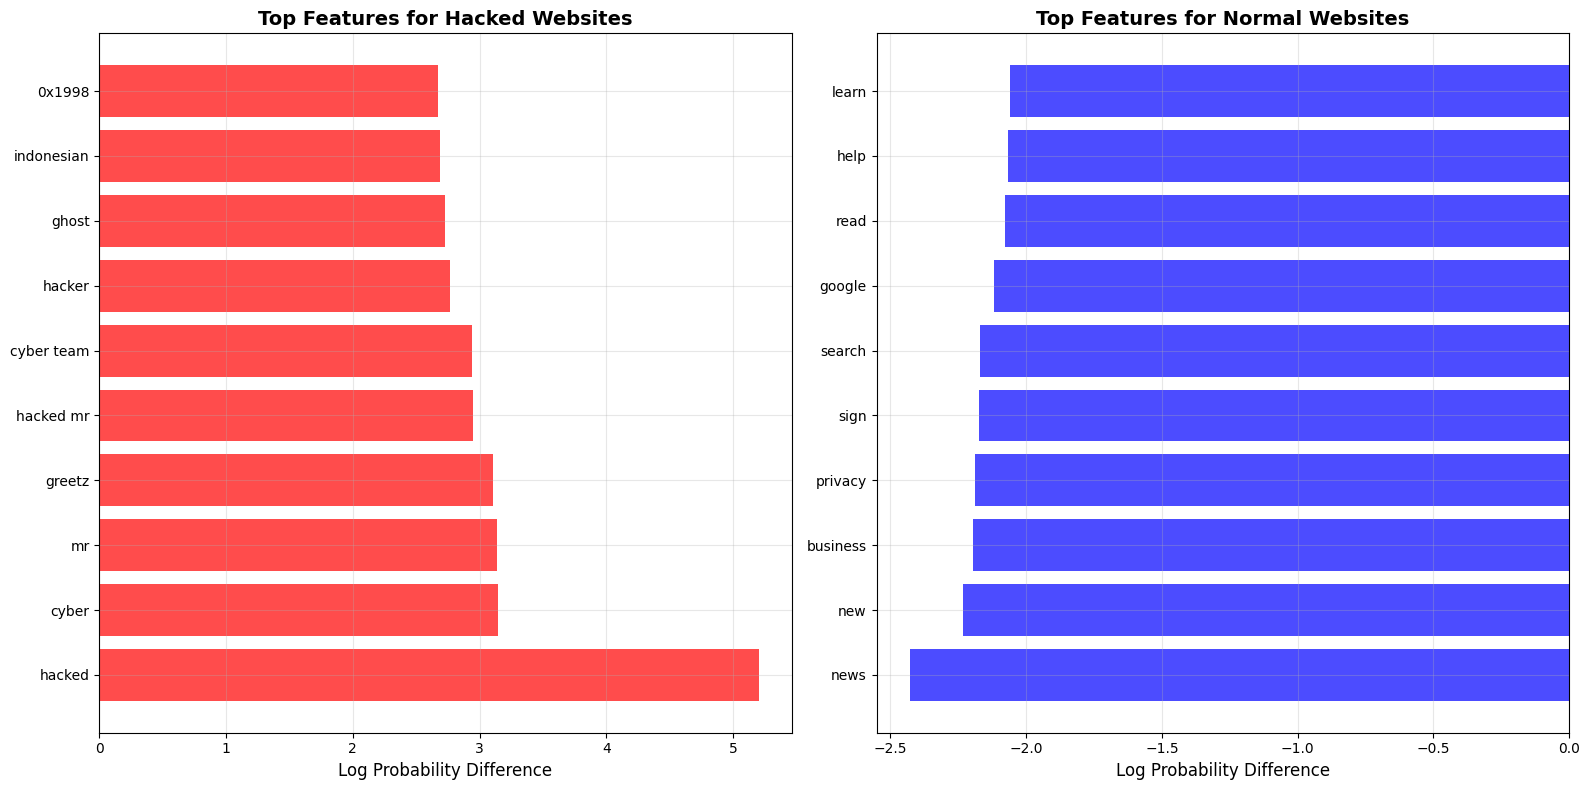

In [7]:
# Feature Importance Analysis
print("=== FEATURE IMPORTANCE ANALYSIS ===")

# Get feature names from TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# For Naive Bayes, we can analyze the log probabilities of features
# Get the log probability for each feature for each class
log_prob_normal = naive_bayes_model.feature_log_prob_[0]  # Class 0 (Normal)
log_prob_hacked = naive_bayes_model.feature_log_prob_[1]  # Class 1 (Hacked)

# Calculate the difference in log probabilities
# Positive values indicate features more associated with hacked websites
# Negative values indicate features more associated with normal websites
log_prob_diff = log_prob_hacked - log_prob_normal

# Get top features for hacked websites
top_hacked_indices = np.argsort(log_prob_diff)[-15:]  # Top 15 features
top_hacked_features = [(feature_names[i], log_prob_diff[i]) for i in top_hacked_indices]

# Get top features for normal websites
top_normal_indices = np.argsort(log_prob_diff)[:15]   # Bottom 15 features
top_normal_features = [(feature_names[i], log_prob_diff[i]) for i in top_normal_indices]

print("=== TOP FEATURES INDICATING HACKED WEBSITES ===")
print("(Higher log probability difference = stronger indication of hacking)")
for i, (feature, score) in enumerate(reversed(top_hacked_features), 1):
    print(f"{i:2d}. '{feature}': {score:.4f}")

print("\n=== TOP FEATURES INDICATING NORMAL WEBSITES ===")
print("(Lower log probability difference = stronger indication of normal site)")
for i, (feature, score) in enumerate(top_normal_features, 1):
    print(f"{i:2d}. '{feature}': {score:.4f}")

# Visualize top features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot top hacked features
hacked_features = [f[0] for f in reversed(top_hacked_features[-10:])]
hacked_scores = [f[1] for f in reversed(top_hacked_features[-10:])]
ax1.barh(range(len(hacked_features)), hacked_scores, color='red', alpha=0.7)
ax1.set_yticks(range(len(hacked_features)))
ax1.set_yticklabels(hacked_features, fontsize=10)
ax1.set_xlabel('Log Probability Difference', fontsize=12)
ax1.set_title('Top Features for Hacked Websites', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot top normal features
normal_features = [f[0] for f in top_normal_features[:10]]
normal_scores = [f[1] for f in top_normal_features[:10]]
ax2.barh(range(len(normal_features)), normal_scores, color='blue', alpha=0.7)
ax2.set_yticks(range(len(normal_features)))
ax2.set_yticklabels(normal_features, fontsize=10)
ax2.set_xlabel('Log Probability Difference', fontsize=12)
ax2.set_title('Top Features for Normal Websites', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
# Testing with New Website Samples
print("=== TESTING WITH NEW WEBSITE SAMPLES ===")

def predict_website_defacement(html_content):
    """
    Predict if a website is hacked or normal using the trained Naive Bayes model
    
    Args:
        html_content (str): HTML content of the website
        
    Returns:
        tuple: (prediction_label, confidence_percentage)
    """
    # Transform the HTML content using the same TF-IDF vectorizer
    html_tfidf = tfidf_vectorizer.transform([html_content])
    
    # Make prediction
    prediction = naive_bayes_model.predict(html_tfidf)[0]
    
    # Get prediction probabilities
    probabilities = naive_bayes_model.predict_proba(html_tfidf)[0]
    
    # Determine result and confidence
    result = "Hacked" if prediction == 1 else "Normal"
    confidence = probabilities[prediction] * 100
    
    return result, confidence

# Test samples representing different types of website content
test_samples = [
    {
        "description": "Normal business website",
        "content": "Welcome to our company website! We offer professional services and high-quality products. Contact us for more information about our business solutions."
    },
    {
        "description": "Obvious hacker message",
        "content": "HACKED BY ANONYMOUS! Your website has been compromised! We are the best hackers in the world!"
    },
    {
        "description": "Normal e-commerce site",
        "content": "Shop our latest collection of products. Free shipping on orders over $50. Customer satisfaction guaranteed. Browse our catalog now!"
    },
    {
        "description": "Defacement with specific hacker group",
        "content": "Hacked By Shield Iran! We Are N3TC4t - Nazila Blackhat. Your security is weak!"
    },
    {
        "description": "Normal informational website",
        "content": "Learn about our services and company history. We have been serving customers for over 20 years with dedication and expertise."
    },
    {
        "description": "Generic hacker message",
        "content": "Site hacked! Pwned by elite hackers! Your website security is nothing to us!"
    }
]

print("Testing the trained Naive Bayes model on various website content samples:\n")

for i, sample in enumerate(test_samples, 1):
    result, confidence = predict_website_defacement(sample["content"])
    
    print(f"Sample {i}: {sample['description']}")
    print(f"Prediction: {result} (Confidence: {confidence:.2f}%)")
    print(f"Content: {sample['content'][:100]}{'...' if len(sample['content']) > 100 else ''}")
    print("-" * 80)

print("\n=== MODEL SUMMARY ===")
print(f"✅ Model successfully trained on {len(X_train)} training samples")
print(f"✅ Achieved {test_accuracy:.1%} accuracy on {len(X_test)} test samples")
print(f"✅ ROC AUC Score: {roc_auc:.3f} ({interpretation} performance)")
print("✅ Ready for real-world website defacement detection!")

=== TESTING WITH NEW WEBSITE SAMPLES ===
Testing the trained Naive Bayes model on various website content samples:

Sample 1: Normal business website
Prediction: Normal (Confidence: 95.96%)
Content: Welcome to our company website! We offer professional services and high-quality products. Contact us...
--------------------------------------------------------------------------------
Sample 2: Obvious hacker message
Prediction: Hacked (Confidence: 95.08%)
Content: HACKED BY ANONYMOUS! Your website has been compromised! We are the best hackers in the world!
--------------------------------------------------------------------------------
Sample 3: Normal e-commerce site
Prediction: Normal (Confidence: 86.42%)
Content: Shop our latest collection of products. Free shipping on orders over $50. Customer satisfaction guar...
--------------------------------------------------------------------------------
Sample 4: Defacement with specific hacker group
Prediction: Hacked (Confidence: 97.81%)
Cont